In [38]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime

In [39]:
data = pd.read_excel('23ocbre22.xls')
data

,Modo dispositivo,Hora,Tensión AC (V),Frecuencia AC (Hz),Tensión de la batería (V),Capacidad de la batería (%),Corriente de carga (A),Corriente descarga batería (A),Tensión de salida (V),Frecuencia de salida (Hz),Potencia de salida aparente (VA),Potencia de salida activa (Watt),Porcentaje de carga (%),Tensión de entrada PV1 (V),Factor de potencia de entrada PV1 (Watt)
0,El modo de batería,2022-10-01 \n00:14:10,"0,0","0,0","24,40",55,4,0,"230,5","49,9",0,0,0,"0,0",0
1,El modo de batería,2022-10-01 \n00:44:14,"0,0","0,0","24,40",55,0,0,"229,8","50,0",0,0,0,"0,0",0
2,El modo de batería,2022-10-01 \n01:04:54,"0,0","0,0","24,40",55,4,0,"229,6","50,0",0,0,0,"0,0",0
3,El modo de batería,2022-10-01 \n01:24:10,"0,0","0,0","24,40",55,0,0,"230,1","49,9",0,0,0,"0,0",0
4,El modo de batería,2022-10-01 \n01:39:12,"0,0","0,0","24,40",55,4,0,"229,9","49,9",0,0,0,"0,0",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10234,El modo de batería,2022-10-23 \n19:16:44,"0,0","0,0","24,50",57,4,0,"230,2","50,0",0,0,0,"120,1",0
10235,El modo de batería,2022-10-23 \n19:26:25,"0,0","0,0","24,50",57,4,0,"229,5","50,0",0,0,0,"120,2",0
10236,El modo de batería,2022-10-23 \n19:44:39,"0,0","0,0","24,40",55,4,0,"229,9","50,0",0,0,0,"120,1",1
10237,El modo de batería,2022-10-23 \n20:00:56,"0,0","0,0","24,40",55,4,0,"230,0","50,0",0,0,0,"69,0",0


In [40]:
hora = np.array(data['Hora'])
index=0

for elem in hora:
    #nuevo = elem.replace('\n','')
    hora[index]= datetime.strptime(elem,'%Y-%m-%d \n%H:%M:%S')
    index+=1

In [41]:
capacidad = np.array(data['Capacidad de la batería (%)'])
index = 0

for elem in capacidad:
    capacidad[index] = int(elem)
    index+=1

In [42]:
vbat = np.array(data['Tensión de la batería (V)'])
index = 0

for elem in vbat:
    vbat[index] = float(elem.replace(',','.'))
    index+=1

In [43]:
salida = np.array(data['Potencia de salida activa (Watt)'])
index = 0

for elem in salida:
    salida[index] = float(elem)
    index+=1

In [44]:
entrada = np.array(data['Factor de potencia de entrada PV1 (Watt)'])
index = 0

for elem in salida:
    entrada[index] = float(elem)
    index+=1

In [45]:
datos = pd.DataFrame({
    'Hora':hora,
    'VBateria':vbat,
    'Capacidad':capacidad,
    'Salida':salida,
    'Entrada':entrada
})

datos

,Hora,VBateria,Capacidad,Salida,Entrada
0,2022-10-01 00:14:10,24.4,55,0,0
1,2022-10-01 00:44:14,24.4,55,0,0
2,2022-10-01 01:04:54,24.4,55,0,0
3,2022-10-01 01:24:10,24.4,55,0,0
4,2022-10-01 01:39:12,24.4,55,0,0
...,...,...,...,...,...
10234,2022-10-23 19:16:44,24.5,57,0,0
10235,2022-10-23 19:26:25,24.5,57,0,0
10236,2022-10-23 19:44:39,24.4,55,0,0
10237,2022-10-23 20:00:56,24.4,55,0,0


                    Hora VBateria  Capacidad  Salida  Entrada
2050 2022-10-04 09:21:54     24.3         52       0        0
2051 2022-10-04 09:39:37     24.7         62       0        0
2052 2022-10-04 09:54:46     25.0         70       0        0
2053 2022-10-04 10:00:36     25.0         70       0        0
2054 2022-10-04 10:01:11     25.0         70      36       36
...                  ...      ...        ...     ...      ...
2623 2022-10-04 20:44:18     24.3         52       0        0
2624 2022-10-04 20:44:53     24.3         52       0        0
2625 2022-10-04 20:45:27     24.3         52       0        0
2626 2022-10-04 20:46:37     24.3         52       0        0
2627 2022-10-04 20:47:12     24.3         52       0        0

[578 rows x 5 columns]


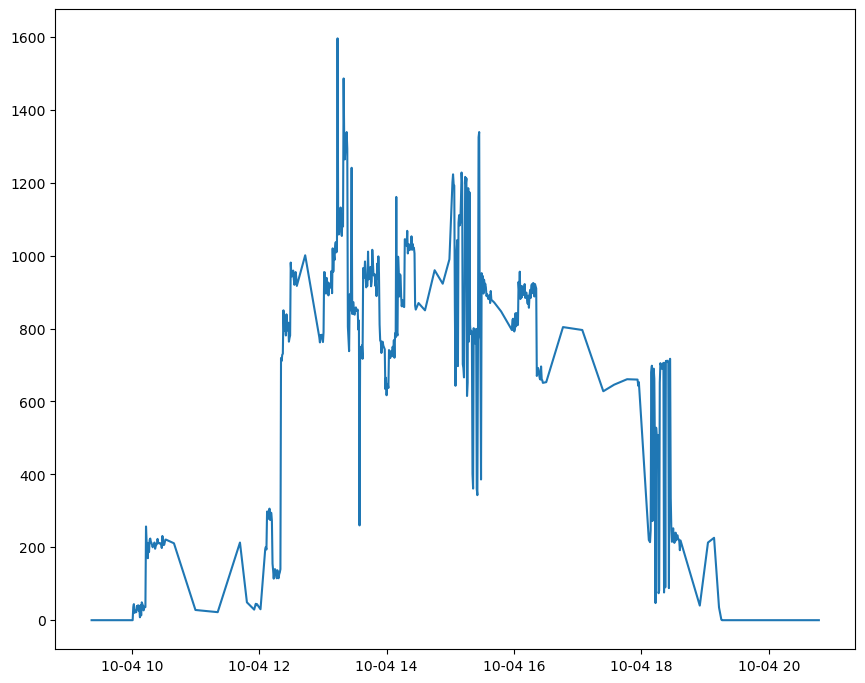

In [46]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_axes([0.1,0.1,0.8,0.8])

dia = 4
mes = 10
ano = 2022

df = datos.loc[(datos['Hora'] >= f'{ano}-{mes}-{dia} 09:00:00') & (datos['Hora'] <= f'{ano}-{mes}-{dia} 21:00:00')]
print(df)
ax.plot(df['Hora'],df['Salida'])
fig.savefig('datos')

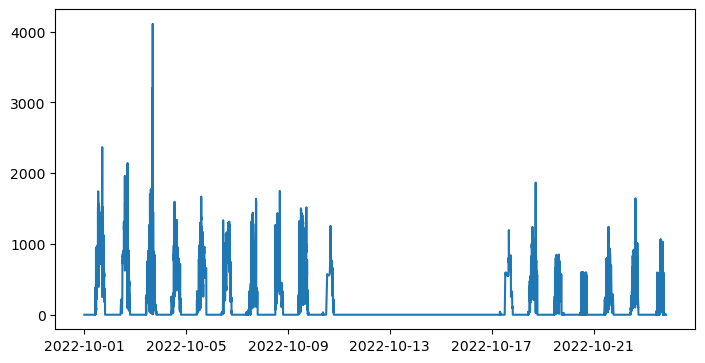

In [47]:
df = pd.DataFrame({'Hora':hora,'VBat':salida})

fig = plt.figure(figsize=(8,4))
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.plot(df['Hora'],df['VBat'])

In [54]:
for index in df.index:
    hora = df.loc[index,'Hora']
    
    
    

2022-10-01 00:14:10
2022-10-01 00:44:14
2022-10-01 01:04:54
2022-10-01 01:24:10
2022-10-01 01:39:12
2022-10-01 02:00:03
2022-10-01 02:31:03
2022-10-01 02:31:37
2022-10-01 02:44:03
2022-10-01 02:44:37
2022-10-01 02:54:24
2022-10-01 03:18:10
2022-10-01 03:37:44
2022-10-01 03:51:45
2022-10-01 03:52:20
2022-10-01 04:11:13
2022-10-01 04:15:22
2022-10-01 04:35:08
2022-10-01 04:44:52
2022-10-01 04:45:26
2022-10-01 04:46:00
2022-10-01 04:46:35
2022-10-01 04:55:42
2022-10-01 04:56:16
2022-10-01 04:56:49
2022-10-01 04:57:24
2022-10-01 05:10:22
2022-10-01 05:40:47
2022-10-01 06:09:10
2022-10-01 06:35:17
2022-10-01 07:05:17
2022-10-01 07:31:13
2022-10-01 07:46:29
2022-10-01 07:47:03
2022-10-01 07:47:38
2022-10-01 08:01:25
2022-10-01 08:17:39
2022-10-01 08:31:10
2022-10-01 08:31:44
2022-10-01 08:32:18
2022-10-01 08:32:52
2022-10-01 08:33:26
2022-10-01 08:34:00
2022-10-01 08:34:34
2022-10-01 08:35:08
2022-10-01 08:38:01
2022-10-01 08:46:45
2022-10-01 08:47:19
2022-10-01 08:47:53
2022-10-01 08:48:27
